In [190]:
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio

In [191]:
pio.templates.default = "plotly_white"

In [192]:
import numpy as np
from sklearn.cross_decomposition import PLSRegression
from scipy.stats import zscore
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error

In [193]:
d0 = np.loadtxt("data13_1.txt")
d0

array([[191.,  36.,  50.,   5., 162.,  60.],
       [189.,  37.,  52.,   2., 110.,  60.],
       [193.,  38.,  58.,  12., 101., 101.],
       [162.,  35.,  62.,  12., 105.,  37.],
       [189.,  35.,  46.,  13., 155.,  58.],
       [182.,  36.,  56.,   4., 101.,  42.],
       [211.,  38.,  56.,   8., 101.,  38.],
       [167.,  34.,  60.,   6., 125.,  40.],
       [176.,  31.,  74.,  15., 200.,  40.],
       [154.,  33.,  56.,  17., 251., 250.],
       [169.,  34.,  50.,  17., 120.,  38.],
       [166.,  33.,  52.,  13., 210., 115.],
       [154.,  34.,  64.,  14., 215., 105.],
       [247.,  46.,  50.,   1.,  50.,  50.],
       [193.,  36.,  46.,   6.,  70.,  31.],
       [202.,  37.,  62.,  12., 210., 120.],
       [176.,  37.,  54.,   4.,  60.,  25.],
       [157.,  32.,  52.,  11., 230.,  80.],
       [156.,  33.,  54.,  15., 225.,  73.],
       [138.,  33.,  68.,   2., 110.,  43.]])

In [194]:
N = d0.shape[0]
N

20

In [195]:
mu = d0.mean(axis=0)
s = d0.std(axis=0, ddof=1)
s

array([24.69050531,  3.20197308,  7.21037265,  5.28627817, 62.56657507,
       51.27747017])

In [196]:
r = np.corrcoef(d0.T)
r

array([[ 1.        ,  0.87024349, -0.36576203, -0.38969365, -0.49308365,
        -0.22629556],
       [ 0.87024349,  1.        , -0.35289213, -0.55223213, -0.64559803,
        -0.19149937],
       [-0.36576203, -0.35289213,  1.        ,  0.15064802,  0.22503808,
         0.03493306],
       [-0.38969365, -0.55223213,  0.15064802,  1.        ,  0.69572743,
         0.49576018],
       [-0.49308365, -0.64559803,  0.22503808,  0.69572743,  1.        ,
         0.66920608],
       [-0.22629556, -0.19149937,  0.03493306,  0.49576018,  0.66920608,
         1.        ]])

In [197]:
px.imshow(img=r)

In [198]:
go.Figure(data=go.Heatmap(z=r, colorscale="Greens"))

In [199]:
d = zscore(d0, ddof=1)
d

array([[ 0.50221734,  0.18738446, -0.84600343, -0.84180209,  0.26291994,
        -0.20086794],
       [ 0.42121455,  0.4996919 , -0.56862526, -1.40930911, -0.56819476,
        -0.20086794],
       [ 0.58322014,  0.81199933,  0.26350927,  0.48238097, -0.71204153,
         0.59870348],
       [-0.67232322, -0.12492297,  0.81826561,  0.48238097, -0.64810963,
        -0.64940801],
       [ 0.42121455, -0.12492297, -1.40075978,  0.67154998,  0.15103911,
        -0.23987143],
       [ 0.13770476,  0.18738446, -0.01386891, -1.0309711 , -0.71204153,
        -0.5518993 ],
       [ 1.31224532,  0.81199933, -0.01386891, -0.27429506, -0.71204153,
        -0.62990627],
       [-0.46981623, -0.43723041,  0.54088744, -0.65263308, -0.32845013,
        -0.59090279],
       [-0.10530364, -1.37415272,  2.48253466,  1.049888  ,  0.87027298,
        -0.59090279],
       [-0.99633441, -0.74953785, -0.01386891,  1.42822602,  1.68540471,
         3.50446306],
       [-0.38881343, -0.43723041, -0.84600343,  1.

In [200]:
a = d[:, :3]
a

array([[ 0.50221734,  0.18738446, -0.84600343],
       [ 0.42121455,  0.4996919 , -0.56862526],
       [ 0.58322014,  0.81199933,  0.26350927],
       [-0.67232322, -0.12492297,  0.81826561],
       [ 0.42121455, -0.12492297, -1.40075978],
       [ 0.13770476,  0.18738446, -0.01386891],
       [ 1.31224532,  0.81199933, -0.01386891],
       [-0.46981623, -0.43723041,  0.54088744],
       [-0.10530364, -1.37415272,  2.48253466],
       [-0.99633441, -0.74953785, -0.01386891],
       [-0.38881343, -0.43723041, -0.84600343],
       [-0.51031762, -0.74953785, -0.56862526],
       [-0.99633441, -0.43723041,  1.09564379],
       [ 2.77029567,  3.31045882, -0.84600343],
       [ 0.58322014,  0.18738446, -1.40075978],
       [ 0.94773273,  0.4996919 ,  0.81826561],
       [-0.10530364,  0.4996919 , -0.29124708],
       [-0.87483021, -1.06184528, -0.56862526],
       [-0.91533161, -0.74953785, -0.29124708],
       [-1.64435679, -0.74953785,  1.65040014]])

In [201]:
b = d[:, 3:]
b

array([[-0.84180209,  0.26291994, -0.20086794],
       [-1.40930911, -0.56819476, -0.20086794],
       [ 0.48238097, -0.71204153,  0.59870348],
       [ 0.48238097, -0.64810963, -0.64940801],
       [ 0.67154998,  0.15103911, -0.23987143],
       [-1.0309711 , -0.71204153, -0.5518993 ],
       [-0.27429506, -0.71204153, -0.62990627],
       [-0.65263308, -0.32845013, -0.59090279],
       [ 1.049888  ,  0.87027298, -0.59090279],
       [ 1.42822602,  1.68540471,  3.50446306],
       [ 1.42822602, -0.40836501, -0.62990627],
       [ 0.67154998,  1.03010273,  0.87172787],
       [ 0.86071899,  1.11001761,  0.67671045],
       [-1.59847812, -1.52717325, -0.39588537],
       [-0.65263308, -1.20751376, -0.76641847],
       [ 0.48238097,  1.03010273,  0.96923658],
       [-1.0309711 , -1.3673435 , -0.88342892],
       [ 0.29321196,  1.34976223,  0.1891669 ],
       [ 1.049888  ,  1.26984736,  0.0526547 ],
       [-1.40930911, -0.56819476, -0.53239756]])

In [202]:
n = a.shape[1]
m = b.shape[1]

In [203]:
rmse = []
for i in range(1, n + 1):
    pls = PLSRegression(i)
    y_cv = cross_val_predict(pls, a, b)
    rmse.append(mean_squared_error(b, y_cv))
nmin = np.argmin(rmse)
rmse

[1.0510364655087698, 1.226654756077784, 1.3432579707543988]

In [204]:
nmin

0

In [205]:
md = PLSRegression(2).fit(a, b)
md

PLSRegression()

In [206]:
xd = md.x_scores_
xd

array([[ 0.64288138, -0.59135171],
       [ 0.7697348 , -0.16666146],
       [ 0.90741814,  0.52120767],
       [-0.68842026,  0.68003114],
       [ 0.4867216 , -1.13272858],
       [ 0.22908101,  0.0716675 ],
       [ 1.40372264,  0.07665883],
       [-0.74359946,  0.2106324 ],
       [-1.71507796,  0.65483231],
       [-1.16256468, -0.16681335],
       [-0.36452043, -0.70066285],
       [-0.74334935, -0.69824313],
       [-1.1867062 ,  0.756965  ],
       [ 4.38975465,  0.75995671],
       [ 0.82318268, -0.97375321],
       [ 0.74902681,  0.52109136],
       [ 0.39288731,  0.20337324],
       [-1.19926745, -0.78270435],
       [-1.04852263, -0.37291692],
       [-1.94238261,  1.12941942]])

In [207]:
np.linalg.pinv(a)

array([[ 0.06324547, -0.00880126, -0.01908236, -0.11281244,  0.09548084,
        -0.0048199 ,  0.13753426, -0.01398008,  0.26991752, -0.0799587 ,
        -0.01660888,  0.01898948, -0.1218568 , -0.0196242 ,  0.0729082 ,
         0.12775571, -0.12077516, -0.0030806 , -0.06619878, -0.19823234],
       [-0.06022646,  0.02542821,  0.07056152,  0.10535638, -0.11806156,
         0.01505152, -0.0679145 , -0.00297496, -0.25845576,  0.02233773,
        -0.03017268, -0.07320093,  0.10012259,  0.19768471, -0.08017622,
        -0.06075742,  0.12610977, -0.07329182,  0.00480396,  0.15777591],
       [-0.04264715, -0.0241734 ,  0.03178991,  0.03898354, -0.08046393,
         0.00281868,  0.02560838,  0.02230454,  0.1381783 , -0.02209299,
        -0.0612491 , -0.04881404,  0.04842735,  0.0180571 , -0.0753507 ,
         0.06835398, -0.01500062, -0.05691852, -0.03784651,  0.07003518]])

In [208]:
zx = np.linalg.pinv(a) @ xd
zx  #自变量的成分系数(列）

array([[ 0.58989082, -0.36795837],
       [ 0.77134081,  0.69990868],
       [-0.23887693,  0.63558684]])

In [209]:
yd = md.y_scores_
zy = np.linalg.pinv(b) @ yd
zy

array([[-1.10103073, -1.38088594],
       [-1.34098948, -0.20064381],
       [-0.4608101 , -0.94164042]])

In [210]:
xzh = md.x_loadings_
xzh

array([[ 0.66591531,  0.01976472],
       [ 0.67602366,  0.35471175],
       [-0.35892139,  1.19418263]])

In [211]:
yzh = md.y_loadings_
yzh

array([[-0.34163079, -0.33638156],
       [-0.41608584, -0.29078321],
       [-0.1429814 , -0.0651935 ]])

In [212]:
beta2 = md.coef_
beta2

D:\Mysoftware_setup\anaconda3\envs\mypytorch\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning:

The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).



array([[-0.07775045, -0.1384491 , -0.06035492],
       [-0.49895014, -0.52446567, -0.15591689],
       [-0.13219198, -0.08542467, -0.00728117]])

In [213]:
beta3 = np.zeros((n + 1, m))
beta3

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [214]:
###
beta3[0, :] = mu[n:] - mu[:n] / s[:n] @ beta2 * s[n:]
beta3

array([[ 47.02042785, 612.57493731, 183.98209459],
       [  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ]])

In [215]:
s

array([24.69050531,  3.20197308,  7.21037265,  5.28627817, 62.56657507,
       51.27747017])

In [216]:
# 每变化1个标准差的回归系数 = 未标准化回归系数 * 该自变量的标准差
# 标准化回归系数 = 未标准化回归系数 * 该自变量的标准差 / 因变量的标准差
# 未标准化回归系数 = 标准化回归系数 * 因变量的标准差 / 该自变量的标准差
for i in range(m):
    beta3[1:, i] = s[n + i] / s[:n] * beta2[:, i]

In [217]:
beta3

array([[ 4.70204278e+01,  6.12574937e+02,  1.83982095e+02],
       [-1.66465010e-02, -3.50834694e-01, -1.25345659e-01],
       [-8.23738730e-01, -1.02480627e+01, -2.49690528e+00],
       [-9.69164303e-02, -7.41255618e-01, -5.17809795e-02]])

In [218]:
aa = np.hstack([np.ones((N, 1)), d0[:, :n]])
aa

array([[  1., 191.,  36.,  50.],
       [  1., 189.,  37.,  52.],
       [  1., 193.,  38.,  58.],
       [  1., 162.,  35.,  62.],
       [  1., 189.,  35.,  46.],
       [  1., 182.,  36.,  56.],
       [  1., 211.,  38.,  56.],
       [  1., 167.,  34.,  60.],
       [  1., 176.,  31.,  74.],
       [  1., 154.,  33.,  56.],
       [  1., 169.,  34.,  50.],
       [  1., 166.,  33.,  52.],
       [  1., 154.,  34.,  64.],
       [  1., 247.,  46.,  50.],
       [  1., 193.,  36.,  46.],
       [  1., 202.,  37.,  62.],
       [  1., 176.,  37.,  54.],
       [  1., 157.,  32.,  52.],
       [  1., 156.,  33.,  54.],
       [  1., 138.,  33.,  68.]])

In [219]:
yh = aa @ beta3  #求预测值
yh

array([[9.34053037e+00, 1.39572471e+02, 6.75634346e+01],
       [8.35625179e+00, 1.28543567e+02, 6.52136587e+01],
       [6.88442847e+00, 1.12444632e+02, 6.19046849e+01],
       [9.48402047e+00, 1.51099673e+02, 7.30739923e+01],
       [1.05852278e+01, 1.53487226e+02, 7.05181552e+01],
       [8.90885030e+00, 1.38282450e+02, 6.83808597e+01],
       [6.77862431e+00, 1.07612118e+02, 5.97520250e+01],
       [1.04183596e+01, 1.61076073e+02, 7.50477312e+01],
       [1.13829272e+01, 1.78285171e+02, 8.06854024e+01],
       [1.18461685e+01, 1.78850010e+02, 7.93812540e+01],
       [1.13542309e+01, 1.67786960e+02, 7.53148497e+01],
       [1.20340762e+01, 1.77605016e+02, 7.80842300e+01],
       [1.02470983e+01, 1.62671902e+02, 7.64701009e+01],
       [1.70939023e-01, 1.74451012e+01, 3.55750249e+01],
       [9.69490309e+00, 1.41835825e+02, 6.75198672e+01],
       [7.17068297e+00, 1.16570160e+02, 6.30663554e+01],
       [8.37882344e+00, 1.31621907e+02, 6.67395903e+01],
       [1.30076335e+01, 1.91010

In [220]:
x0 = np.arange(1, 4)
fig = go.Figure()
fig.add_bar(x=x0, y=beta2[0, :], width=0.1, name="1")
fig.add_bar(x=x0 + 0.1, y=beta2[1, :], width=0.1, name="2")
fig.add_bar(x=x0 + 0.2, y=beta2[2, :], width=0.1, name="3")
fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=[1.1, 2.1, 3.1],
        ticktext=["单杠", "弯曲", "跳高"]
    ),
    # showlegend=False
    legend=dict(
        title="title",
    )
)
fig

In [221]:
b0 = d0[:, 3:]
b0

array([[  5., 162.,  60.],
       [  2., 110.,  60.],
       [ 12., 101., 101.],
       [ 12., 105.,  37.],
       [ 13., 155.,  58.],
       [  4., 101.,  42.],
       [  8., 101.,  38.],
       [  6., 125.,  40.],
       [ 15., 200.,  40.],
       [ 17., 251., 250.],
       [ 17., 120.,  38.],
       [ 13., 210., 115.],
       [ 14., 215., 105.],
       [  1.,  50.,  50.],
       [  6.,  70.,  31.],
       [ 12., 210., 120.],
       [  4.,  60.,  25.],
       [ 11., 230.,  80.],
       [ 15., 225.,  73.],
       [  2., 110.,  43.]])

In [222]:
mb = np.max(b0, axis=0)
mb

array([ 17., 251., 250.])

In [223]:
from plotly.subplots import make_subplots

fig = make_subplots(cols=3)
fig.add_scatter(x=yh[:, 0], y=d0[:, 3], mode="markers", row=1, col=1)
fig.add_scatter(x=[0, mb[0]], y=[0, mb[0]], row=1, col=1)
fig.add_scatter(x=yh[:, 1], y=d0[:, 4], mode="markers", row=1, col=2)
fig.add_scatter(x=np.linspace(0, mb[1], 100), y=np.linspace(0, mb[1], 100), row=1, col=2)
fig.add_scatter(x=yh[:, 2], y=d0[:, 5], mode="markers", row=1, col=3)
fig.add_scatter(x=np.linspace(0, mb[2], 100), y=np.linspace(0, mb[2], 100), row=1, col=3)
fig

D:\Mysoftware_setup\anaconda3\envs\mypytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from current font.

D:\Mysoftware_setup\anaconda3\envs\mypytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from current font.

D:\Mysoftware_setup\anaconda3\envs\mypytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.

D:\Mysoftware_setup\anaconda3\envs\mypytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from current font.

D:\Mysoftware_setup\anaconda3\envs\mypytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 35266 (\N{CJK UNIFIED IDEOGRAPH-89C2}) missing from current font.



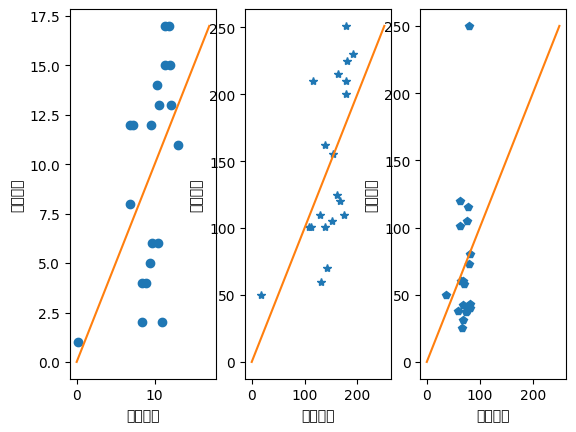

In [224]:
import pylab as plt

plt.figure();
plt.subplot(131)
plt.plot(yh[:, 0], d0[:, 3], 'o', [0, mb[0]], [0, mb[0]])
plt.xlabel('预测数据');
plt.ylabel('观测数据')
plt.subplot(132)
plt.plot(yh[:, 1], d0[:, 4], '*', [0, mb[1]], [0, mb[1]])
plt.xlabel('预测数据');
plt.ylabel('观测数据')
plt.subplot(133)
plt.plot(yh[:, 2], d0[:, 5], 'p', [0, mb[2]], [0, mb[2]])
plt.xlabel('预测数据');
plt.ylabel('观测数据');
plt.show()


In [225]:
d0 = np.loadtxt("data13_2.txt")
mu = d0.mean(axis=0)  #求均值
s = d0.std(axis=0, ddof=1)  #求标准差
d0

array([[4.25200000e+03, 8.75550000e+04, 5.11275000e+03, 7.58820000e+02,
        6.39000000e+00, 1.02000000e+02, 1.63838000e+03, 9.47960000e+04,
        3.01122110e+08, 2.28950000e+04, 5.55500000e+03],
       [4.98600000e+03, 9.48290000e+04, 5.75879000e+03, 8.17540000e+02,
        6.44000000e+00, 1.20740000e+02, 2.11270000e+03, 9.33080000e+04,
        1.20458300e+06, 2.25730000e+04, 5.63000000e+03],
       [6.22200000e+03, 1.00448000e+05, 6.34784000e+03, 8.42560000e+02,
        6.94500000e+00, 1.26020000e+02, 2.39118000e+03, 9.50850000e+04,
        1.25733200e+06, 2.05450000e+04, 5.75500000e+03],
       [7.32600000e+03, 1.08830000e+05, 7.27956000e+03, 9.23240000e+02,
        7.19000000e+00, 1.40990000e+02, 2.83192000e+03, 1.00164000e+05,
        1.26900400e+06, 1.91510000e+04, 6.09400000e+03],
       [8.99300000e+03, 1.64336000e+05, 8.34439000e+03, 1.04726000e+03,
        7.44000000e+00, 1.62240000e+02, 3.17554000e+03, 1.05073000e+05,
        1.34739200e+06, 1.93860000e+04, 6.72200000e+

In [226]:
d0 = zscore(d0, ddof=1)
d0

array([[-1.34223405, -1.27048446, -1.46866192, -0.93355878, -0.9636976 ,
        -1.1658176 , -1.38428354, -0.96779947,  3.01510601,  1.57022807,
        -0.89081424],
       [-1.18763558, -1.17391757, -1.20700974, -0.87545609, -0.94370765,
        -0.9195006 , -1.04354751, -1.11627054, -0.30434095,  1.39367025,
        -0.87008059],
       [-0.92730357, -1.09932184, -0.96843904, -0.85069912, -0.74180909,
        -0.85010072, -0.84349656, -0.93896336, -0.30375713,  0.28168499,
        -0.8355245 ],
       [-0.694774  , -0.98804556, -0.59108382, -0.77086728, -0.64385831,
        -0.65333629, -0.52688331, -0.4321861 , -0.30362794, -0.4826678 ,
        -0.7418084 ],
       [-0.34366277, -0.25116877, -0.15981782, -0.64815106, -0.54390853,
        -0.37402807, -0.2800379 ,  0.05762873, -0.30276036, -0.35381349,
        -0.56819864],
       [-0.0195115 ,  0.12150454,  0.06573183, -0.48371806, -0.38398888,
        -0.16793146, -0.03089372,  0.0658106 , -0.30214713, -0.7601158 ,
        -0.346

In [227]:
x = d0[:, :7]
x

array([[-1.34223405, -1.27048446, -1.46866192, -0.93355878, -0.9636976 ,
        -1.1658176 , -1.38428354],
       [-1.18763558, -1.17391757, -1.20700974, -0.87545609, -0.94370765,
        -0.9195006 , -1.04354751],
       [-0.92730357, -1.09932184, -0.96843904, -0.85069912, -0.74180909,
        -0.85010072, -0.84349656],
       [-0.694774  , -0.98804556, -0.59108382, -0.77086728, -0.64385831,
        -0.65333629, -0.52688331],
       [-0.34366277, -0.25116877, -0.15981782, -0.64815106, -0.54390853,
        -0.37402807, -0.2800379 ],
       [-0.0195115 ,  0.12150454,  0.06573183, -0.48371806, -0.38398888,
        -0.16793146, -0.03089372],
       [ 0.1953256 ,  0.60923769,  0.42600376, -0.04162503, -0.00817771,
         0.1728903 ,  0.22484508],
       [ 0.57634552,  0.88344571,  0.17302688,  0.31652979, -0.04016164,
        -0.21866697, -0.08842776],
       [ 0.90618366,  0.83587915,  0.87677574,  1.17026933,  0.88737232,
         0.87661559,  0.82277819],
       [ 1.1837869 ,  0.8717

In [228]:
y = d0[:, 7:]
y

array([[-0.96779947,  3.01510601,  1.57022807, -0.89081424],
       [-1.11627054, -0.30434095,  1.39367025, -0.87008059],
       [-0.93896336, -0.30375713,  0.28168499, -0.8355245 ],
       [-0.4321861 , -0.30362794, -0.4826678 , -0.7418084 ],
       [ 0.05762873, -0.30276036, -0.35381349, -0.56819864],
       [ 0.0658106 , -0.30214713, -0.7601158 , -0.34648681],
       [ 0.1108109 , -0.30134516, -0.73379662, -0.05068673],
       [-0.72194415, -0.30146605, -1.58423506, -0.0050727 ],
       [ 0.72524964, -0.29969307, -0.5435309 ,  0.92490062],
       [ 1.10630542, -0.29888673,  0.10732044,  1.39596915],
       [ 2.11135834, -0.29708149,  1.10525593,  1.98780285]])

In [229]:
n = x.shape[1]
m = y.shape[1]
n, m

(7, 4)

In [230]:
rmse = []
for i in range(1, n + 1):
    pls = PLSRegression(i)
    y_cv = cross_val_predict(pls, x, y)
    rmse.append(mean_squared_error(y, y_cv))
rmse

[1.3817678847232744,
 0.9460647060618946,
 1.1571480279879913,
 1.047496577242248,
 2.0568922813221766,
 2.3722581597966412,
 3.204406617154461]

In [231]:
nmin = np.argmin(rmse)
nmin + 1

2

In [232]:
md = PLSRegression(2).fit(x, y)
beta2 = md.coef_
beta2

D:\Mysoftware_setup\anaconda3\envs\mypytorch\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning:

The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).



array([[ 0.01032155, -0.2845245 , -0.64184011,  0.00342245],
       [-0.10191343, -0.46476058, -1.14269303, -0.12111542],
       [-0.00341803, -0.31449316, -0.72121239, -0.01203404],
       [ 0.25589468,  0.1644452 ,  0.57879911,  0.27737107],
       [ 0.34036319,  0.30641679,  0.97019374,  0.37126748],
       [ 0.27856259,  0.18848473,  0.65171196,  0.30219406],
       [ 0.1607601 , -0.02616608,  0.0678153 ,  0.17079898]])

In [233]:
beta3 = np.zeros((n + 1, m))
beta3[0, :] = mu[n:] - mu[:n] / s[:n] @ beta2 * s[n:]
beta3

array([[ 7.94240978e+04,  1.29895513e+08,  2.10767584e+04,
        -7.67986506e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00]])

In [235]:
for i in range(m):
    beta3[1:, i] = s[n + i] / s[:n] * beta2[:, i]
beta3

array([[ 7.94240978e+04,  1.29895513e+08,  2.10767584e+04,
        -7.67986506e+02],
       [ 2.17878837e-02, -5.41458151e+03, -2.46549932e-01,
         2.60754565e-03],
       [-1.35596188e-02, -5.57468512e+02, -2.76664502e-02,
        -5.81620726e-03],
       [-1.38740188e-02, -1.15083286e+04, -5.32717597e-01,
        -1.76303924e-02],
       [ 2.53765504e+00,  1.47016991e+04,  1.04449653e+00,
         9.92788833e-01],
       [ 1.36378376e+03,  1.10685442e+07,  7.07406785e+02,
         5.36925754e+02],
       [ 3.66951515e+01,  2.23839681e+05,  1.56224593e+01,
         1.43679964e+01],
       [ 1.15740670e+00, -1.69832758e+03,  8.88470958e-02,
         4.43830754e-01]])